In [10]:

import os
import pandas as pd
from matplotlib import pyplot as plt


path = './data/raw/'
files = os.listdir(path)
print(*files)
fname = path + input()


ThinkLegdata2021-05-20T16_27_27.892330.csv


In [11]:
df = pd.read_csv(fname, delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passingtime  15001 non-null  float64
 1   input        15001 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


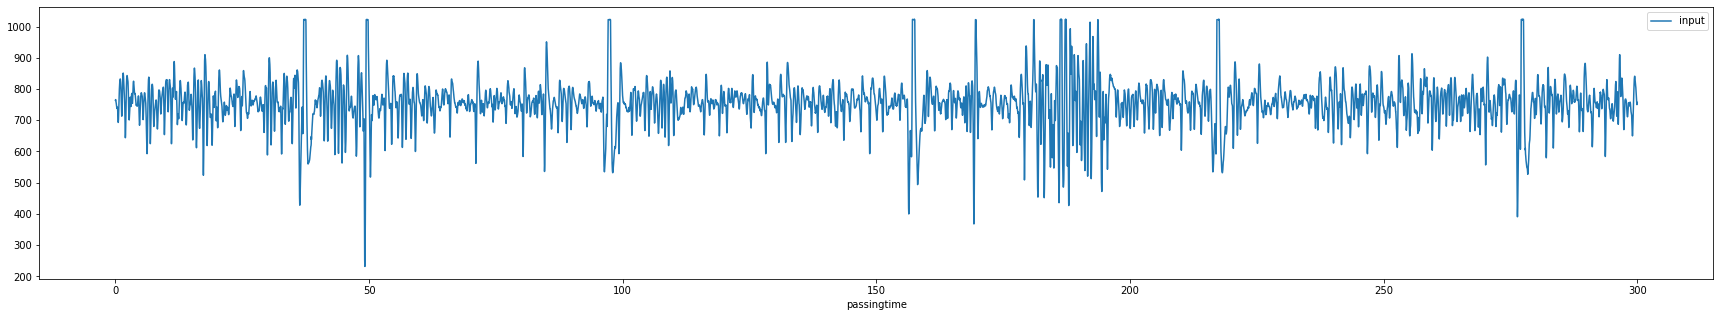

In [13]:
df.plot(x='passingtime', y='input', figsize=(30, 5))
plt.savefig(fname+'.png')